In [2]:
# manpulation
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
#import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
# from imblearn.under_sampling import RandomUnderSampler # undersampling
# from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling


In [ ]:
#  1) understand columns
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data
df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### 1) Understanding Data

# columns meaning:
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# domain knowledge:
- avg_glucose_level:
-Neonate - 30-60 mg/dL or 1.7-3.3 mmol/L  حديث الولادة
Infant - 40-90 mg/dL or 2.2-5.0 mmol/L طفل رضيع
Child < 2 years - 60-100 mg/dL or 3.3-5.5 mmol/L
Adult - 74-106 mg/dL or 4.1-5.9 mmol/L
For children over age 2 years to adult, the normal reference ranges are as follows :

Fasting (ie, no caloric intake for at least 8 hours) - 70-100 mg/dL or < 5.5 mmol/L
Casual or random (ie, any time of day, with no regard to food intake) - ≤200 mg/dL (< 11.1 mmol/L)

- Normal BMI:	18.5 - 25

This is the World Health Organization's (WHO) recommended body weight based on BMI values for adults. It is used for both men and women, age 20 or older.

Classification	BMI range - kg/m2
Severe Thinness	< 16
Moderate Thinness	16 - 17
Mild Thinness	17 - 18.5
Normal	18.5 - 25
Overweight	25 - 30
Obese Class I	30 - 35
Obese Class II	35 - 40
Obese Class III	> 40



In [4]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df[df['age'] < 1]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,54747,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,68908,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,30084,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,40544,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [7]:
# check duplicates
df.duplicated().sum()

0

In [7]:
# drop id column (unnecessary feature)
df = df.drop(["id"], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# check duplecates after drop "id" column
df.duplicated().sum()

0

In [9]:
#  Describe Categorical Cols
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\': {df[col].nunique()}")
    print(f"uniques of \'{col}\': {df[col].unique()}")
    print()
    print("*" * 50)
    print()

number of uniques of 'gender': 3
uniques of 'gender': ['Male' 'Female' 'Other']

**************************************************

number of uniques of 'ever_married': 2
uniques of 'ever_married': ['Yes' 'No']

**************************************************

number of uniques of 'work_type': 5
uniques of 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

**************************************************

number of uniques of 'Residence_type': 2
uniques of 'Residence_type': ['Urban' 'Rural']

**************************************************

number of uniques of 'smoking_status': 4
uniques of 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

**************************************************



In [10]:
# check smoking_status for children
df[df['work_type'] == 'children']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


In [12]:
df_stroke = df.copy()

In [13]:
# handling unknown in smoking_status
# if age <= 10 -> never smoked
# if age> 10 -> nan

df_stroke['smoking_status'] = np.where((df_stroke['age'] <= 10) & (df_stroke['smoking_status'] == 'Unknown'), 'never smoked', df_stroke['smoking_status'])
df_stroke['smoking_status'] = np.where((df_stroke['age'] > 10) & (df_stroke['smoking_status'] == 'Unknown'), np.nan, df_stroke['smoking_status'])

In [14]:
df_stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:

In [15]:
# Classification	BMI range - kg/m2
# Severe Thinness	< 16
# Moderate Thinness	16 - 17
# Mild Thinness	17 - 18.5
# Normal	18.5 - 25
# Overweight	25 - 30
# Obese Class I	30 - 35
# Obese Class II	35 - 40
# Obese Class III	> 40
def bmi_status(arg): 
    if arg <= 16:
        return "Severe Thinness"
    
    elif 16<arg<=17:
        return "Moderate Thinness"

    elif 17<arg<18.5:
        return "Mild Thinness"
    elif 18.5<=arg<=25:
        return "Normal"
    elif 25<arg<=30:
        return "Overweight"
    elif 30<arg<=35:
        return "Obese Class I"
    elif 35<arg<40:
        return "Obese Class II"
    elif arg>=40:
        return "Obese Class III"
    
    
df_stroke['body_mass_status'] = df['bmi'].apply(bmi_status)
df_stroke['body_mass_status']

0        Obese Class II
1                  None
2         Obese Class I
3         Obese Class I
4                Normal
             ...       
5105               None
5106    Obese Class III
5107      Obese Class I
5108         Overweight
5109         Overweight
Name: body_mass_status, Length: 5110, dtype: object

In [16]:
# to check bmi and body_mass_status with the bmi_status function
# the nan values of body_mass_status comes only from nan values of bmi
#df_stroke.loc[(df_stroke['body_mass_status'].isnull()) & df['bmi'].notnull() ]
#df_stroke[(df_stroke['body_mass_status'] .isnull()) & (df['bmi'] .notnull())]
df_stroke['body_mass_status'].unique()
#df_stroke['bmi'].isnull().sum()
#df_stroke['body_mass_status'].isnull().sum()



array(['Obese Class II', None, 'Obese Class I', 'Normal', 'Overweight',
       'Obese Class III', 'Moderate Thinness', 'Mild Thinness',
       'Severe Thinness'], dtype=object)

In [17]:
# - avg_glucose_level:
# -Neonate - 30-60 mg/dL or 1.7-3.3 mmol/L  حديث الولادة
# Infant - 40-90 mg/dL or 2.2-5.0 mmol/L طفل رضيع
# Child < 2 years - 60-100 mg/dL or 3.3-5.5 mmol/L
# Adult - 74-106 mg/dL or 4.1-5.9 mmol/L
# For children over age 2 years to adult, the normal reference ranges are as follows :

# Fasting (ie, no caloric intake for at least 8 hours) - 70-100 mg/dL or < 5.5 mmol/L
# Casual or random (ie, any time of day, with no regard to food intake) - ≤200 mg/dL (< 11.1 mmol/L)
def glucose_status(arg1,arg2): 
    if arg1 <= 0.6 and 30<=arg2<=60:
        return "Normal glucose"
    elif arg1 <= 0.6 and arg2>60:
        return "Over glucose"
    elif arg1 <= 0.6 and arg2<30:
        return "Under glucose"
    elif 0.6<arg1<=2 and 40<=arg2<=90:
        return "Normal glucose"
    elif 0.6<arg1<=2 and arg2>90:
        return "Over glucose"
    elif 0.6<arg1<=2 and arg2<40:
        return "Under glucose"
    elif arg1>2 and 70<=arg2<=100:
        return "Normal glucose"
    elif arg1>2 and arg2>100:
        return "Over glucose"
    elif arg1>2 and arg2<70:
        return "Under glucose"
    
df_stroke['glucose_status'] = np.vectorize(glucose_status)(df_stroke['age'], df_stroke['avg_glucose_level'])

df_stroke['glucose_status']

0         Over glucose
1         Over glucose
2         Over glucose
3         Over glucose
4         Over glucose
             ...      
5105    Normal glucose
5106      Over glucose
5107    Normal glucose
5108      Over glucose
5109    Normal glucose
Name: glucose_status, Length: 5110, dtype: object

In [18]:
#df_stroke['glucose_status'].unique()

df_stroke[(df_stroke['age'] == 5) & (df_stroke['avg_glucose_level'] == 70)]
#df_stroke['glucose_status'].isnull().sum()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,body_mass_status,glucose_status
1765,Male,5.0,0,0,No,children,Urban,70.0,18.6,never smoked,0,Normal,Normal glucose


In [19]:
df_stroke.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1047
stroke                  0
body_mass_status      201
glucose_status          0
dtype: int64

In [20]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4063 non-null   object 
 10  stroke             5110 non-null   int64  
 11  body_mass_status   4909 non-null   object 
 12  glucose_status     5110 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 519.1+ KB


In [21]:
df_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [22]:

df_stroke[(df_stroke['gender'] == 'Other')] 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,body_mass_status,glucose_status
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Normal,Over glucose


In [23]:
# drop one row for gender='other

df_stroke.drop([3116], inplace=True,axis=0)
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,body_mass_status,glucose_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese Class II,Over glucose
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,None,Over glucose
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese Class I,Over glucose
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese Class I,Over glucose
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal,Over glucose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,None,Normal glucose
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Obese Class III,Over glucose
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Obese Class I,Normal glucose
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Overweight,Over glucose


age


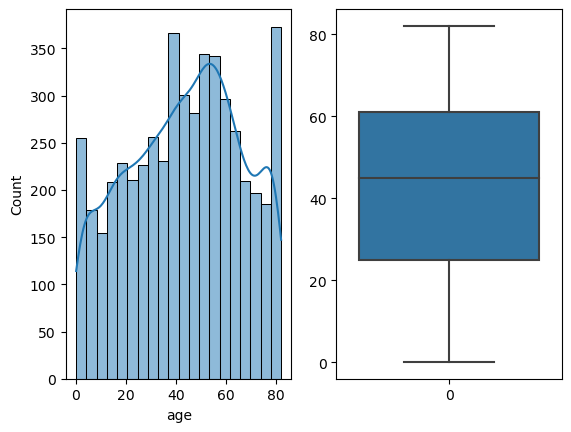

hypertension


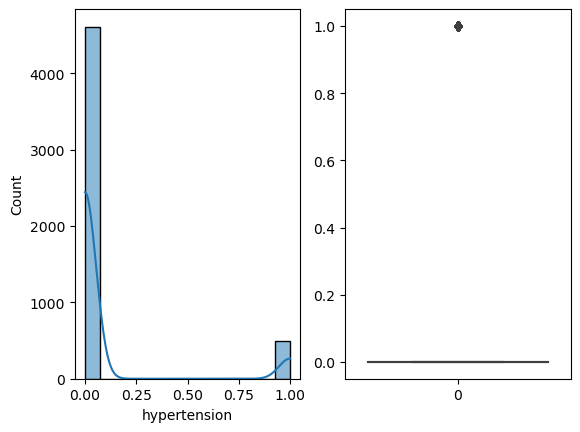

heart_disease


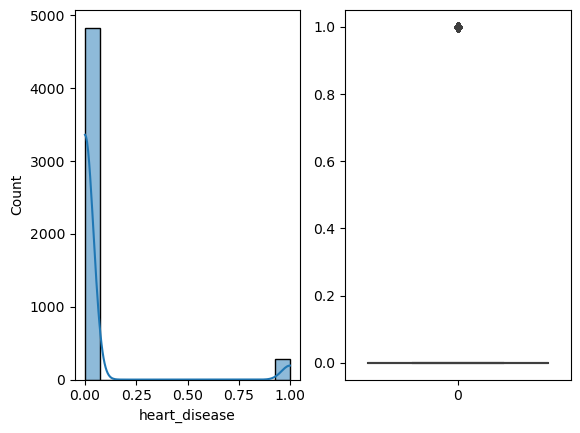

avg_glucose_level


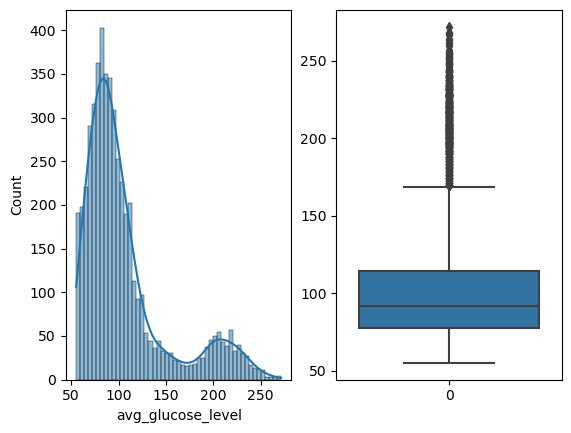

bmi


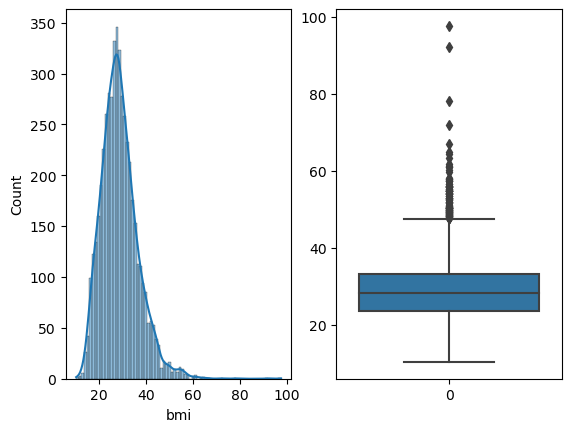

stroke


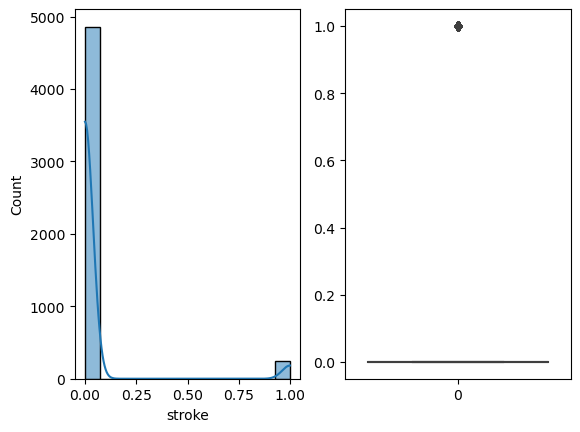

In [24]:
## EDA
### univariate: (num -> hist,box | cat-> pie/countplot)
num_cols = df_stroke.select_dtypes(include='number').columns
for col in num_cols:
    print(col)
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df_stroke[col], kde=True, ax=axes[0])
    sns.boxplot(df_stroke[col], ax=axes[1])
    plt.show()

gender


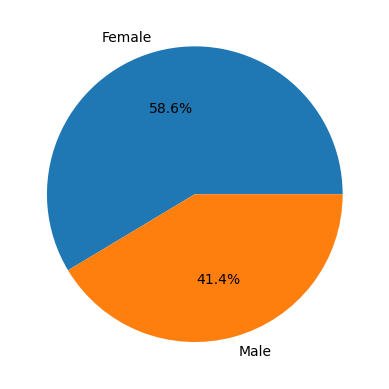

ever_married


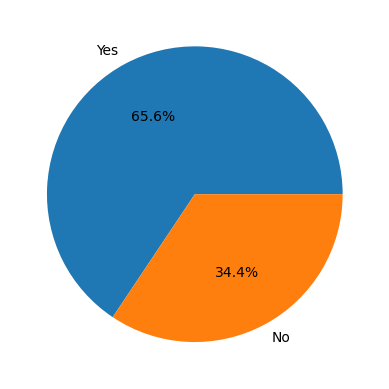

work_type


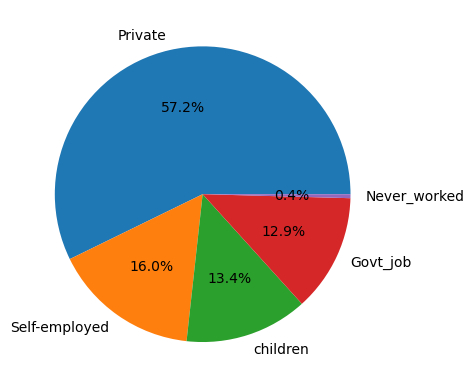

Residence_type


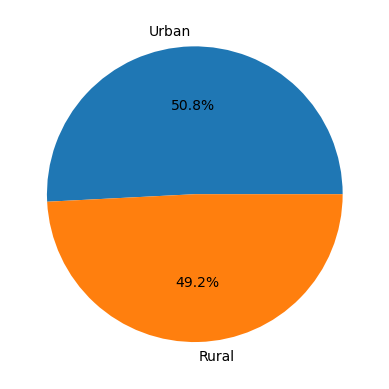

smoking_status


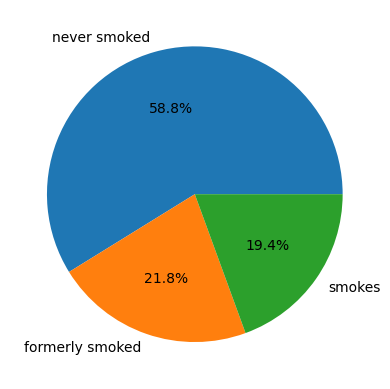

body_mass_status


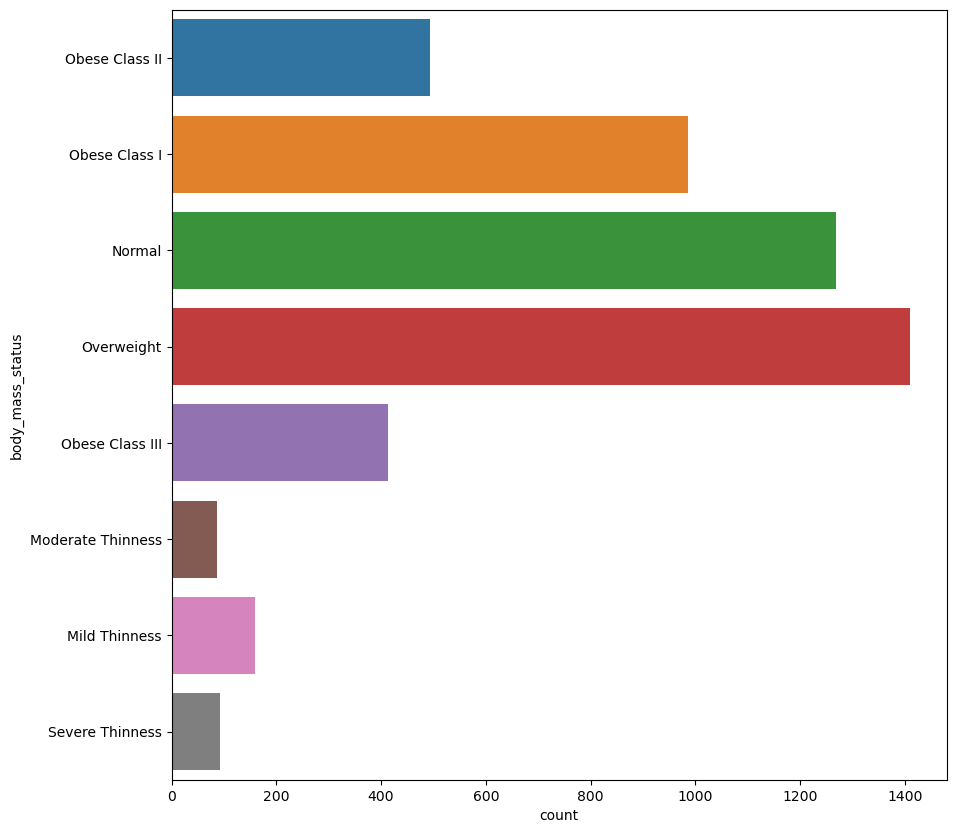

glucose_status


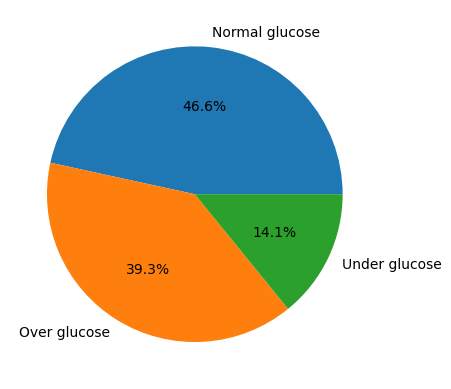

In [25]:
cat_cols = df_stroke.select_dtypes(include="O").columns

for col in cat_cols:
    print(col)
    
    if df_stroke[col].nunique() <= 7:
        df_pie = df_stroke.groupby(col)[["age"]].count().sort_values(by='age', ascending=False)
        plt.pie(labels=df_pie.index, x=df_pie['age'], autopct="%1.1f%%")
    elif df_stroke[col].nunique() > 7 and df_stroke[col].nunique() < 35:
        plt.figure(figsize=(10, 10))
        sns.countplot(y=df_stroke[col])
    else: # count > 35 show top 20
        plt.figure(figsize=(10, 10))
        df_bar = df_stroke.groupby(col)[['age']].count().reset_index().sort_values(by='age', ascending=False).head(20)
        sns.barplot(y=df_bar[col], x=df_bar['age'])
    plt.show()

comment on numeric features:
==============================
age:
range(0.08,82) 
distrbution is normal
no outliers 
****************************************************
hypertension:
range(0, 1) most of values (0)
distrbution is uniform
no outliers 
****************************************************
heart_disease:
range(0, 1) most of values (0)
distrbution is uniform
no outliers 
****************************************************
avg_glucose_level:
range(55.12, 271.74) 
distrbution is right skewed
there are outliers after higher boundary
****************************************************
bmi:
range(10.3,97.6) 
distrbution is right skewed
there are outliers after higher boundary
****************************************************
stroke:
range(0, 1) most of values (1)
distrbution is uniform
no outliers 
****************************************************
comment on categorical features:
=================================
gender:
Female is the most gender in data
ever_married:
Yes is the most in data
work_type:
private is the most type in data
residance_type:
Urban and Rural are the same
smoking_status:
Never Smoked is the most in data
body_mass_status:
Over weight is the most in data
glucose_status:
Normal glucose is the most in data



<Axes: >

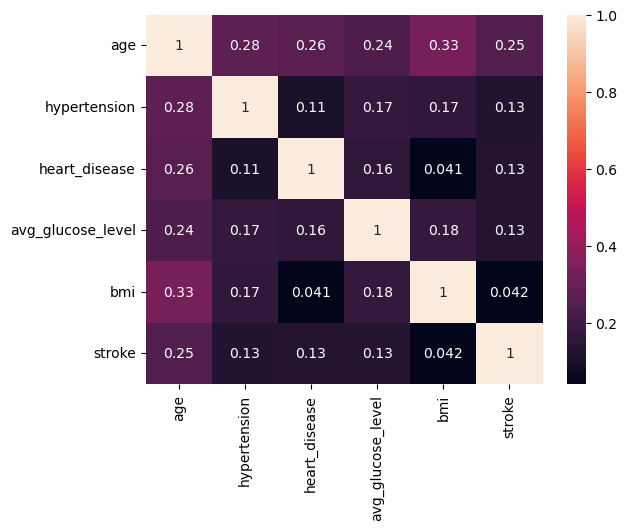

In [27]:
# bi-variate
sns.heatmap(df_stroke.select_dtypes(include='number').corr(), annot=True)

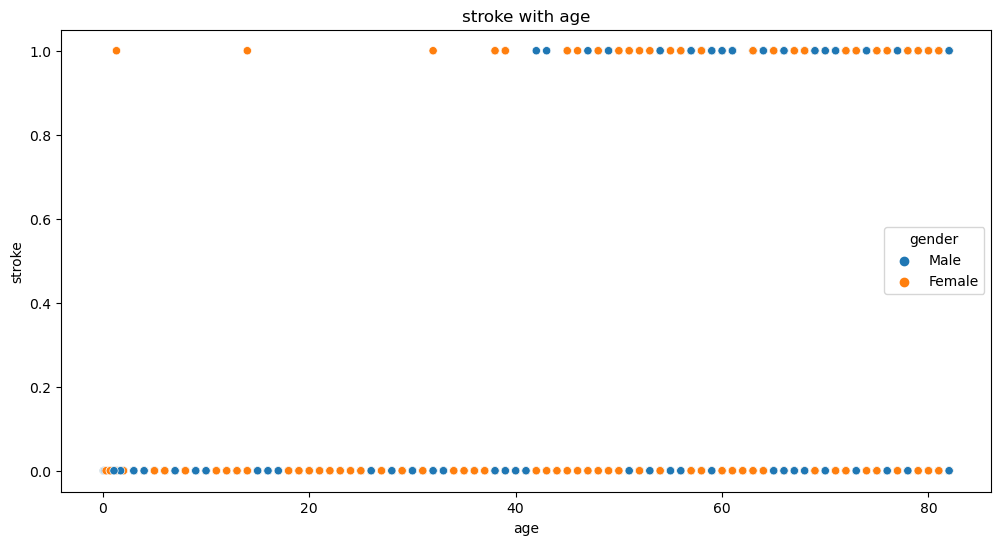

In [28]:
# Question_1: what is the relation between age and stroke
# scatterplot for age ,stroke
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_stroke,x="age",y="stroke",hue="gender")
plt.title("stroke with age")
plt.xlabel('age')
plt.ylabel('stroke')
plt.show()

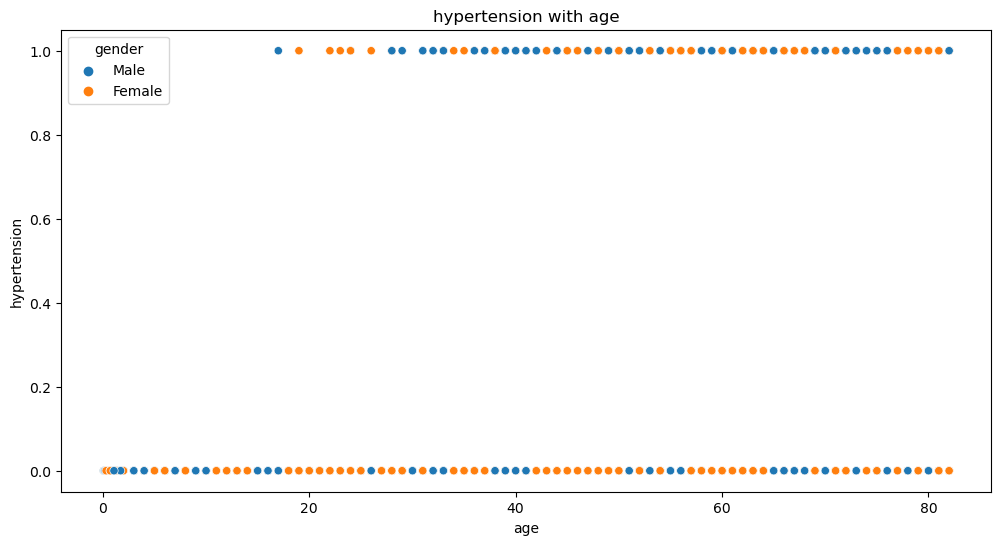

In [29]:
# Question_2: what is the relation between age and hypertension
# scatterplot for age ,hypertension
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_stroke,x="age",y="hypertension",hue="gender")
plt.title("hypertension with age")
plt.xlabel('age')
plt.ylabel('hypertension')
plt.show()

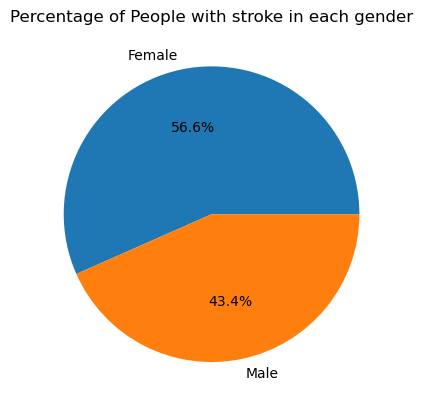

In [30]:
# Question_3: what is the stroked  in each gender 
df_stroked = df_stroke[df_stroke['stroke'] == 1]

# plt.figure(figsize=(10, 10))
# sns.countplot(y=df_stroked['gender'])
df_pie = df_stroked.groupby('gender')[["age"]].count().sort_values(by='age', ascending=False)
plt.pie(labels=df_pie.index, x=df_pie['age'], autopct="%1.1f%%")
plt.title("Percentage of People with stroke in each gender")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

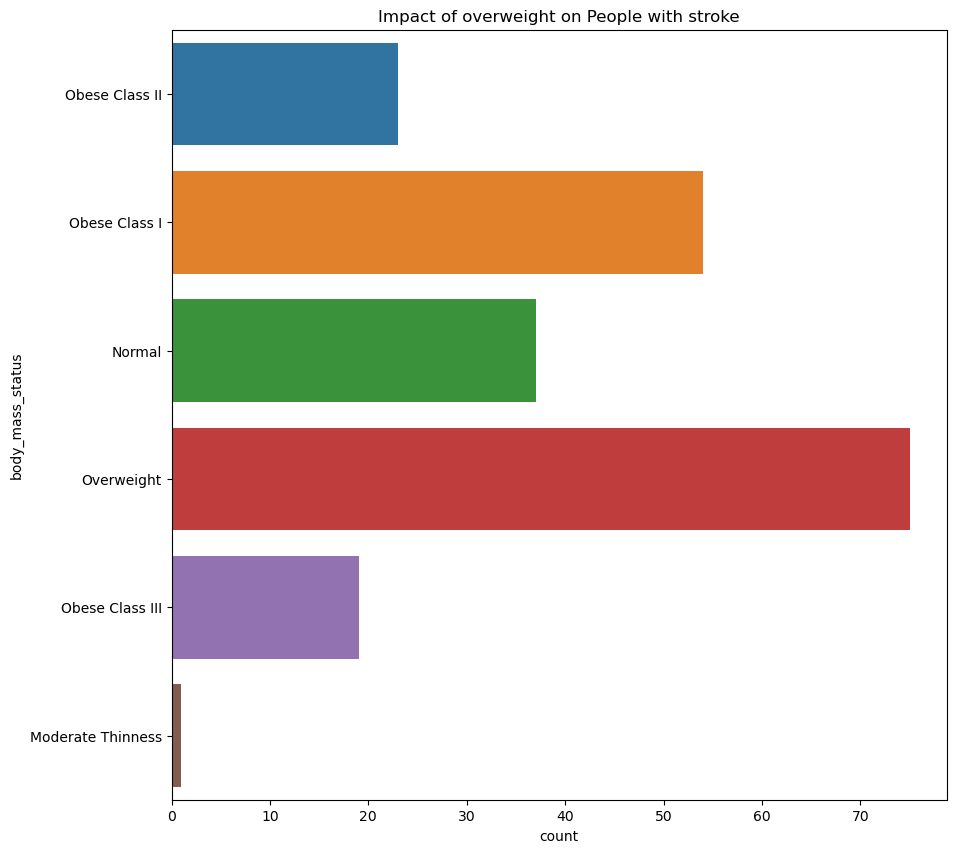

In [31]:
# Question_4: impact of over weight on People with stroke
plt.figure(figsize=(10, 10))
sns.countplot(y=df_stroked['body_mass_status'])
plt.title("Impact of overweight on People with stroke")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

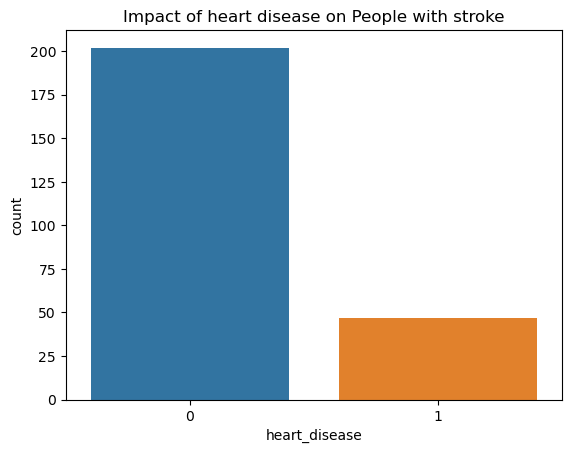

In [32]:
# Question_5: impact of heart disease  on People with stroke
#plt.figure(figsize=(10, 10))
sns.countplot(x=df_stroked['heart_disease'])
plt.title("Impact of heart disease on People with stroke")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

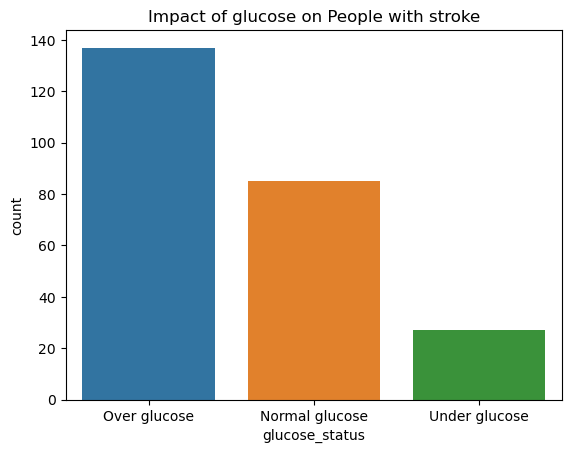

In [33]:
# Question_6: impact of gulocse level on People with stroke
#plt.figure(figsize=(10, 10))
sns.countplot(x=df_stroked['glucose_status'])
plt.title("Impact of glucose on People with stroke")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

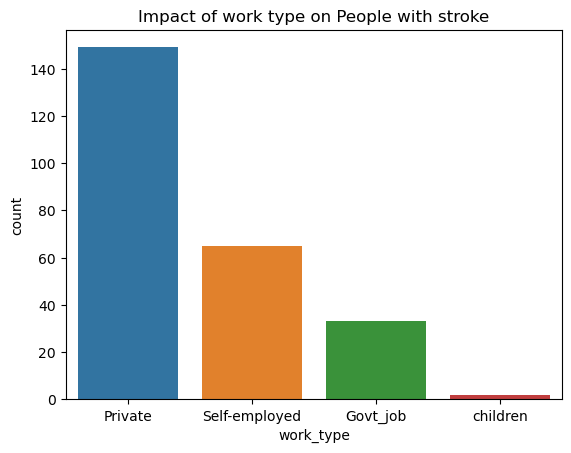

In [34]:
# Question_7: impact of work type on People with stroke
#plt.figure(figsize=(10, 10))
sns.countplot(x=df_stroked['work_type'])
plt.title("Impact of work type on People with stroke")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

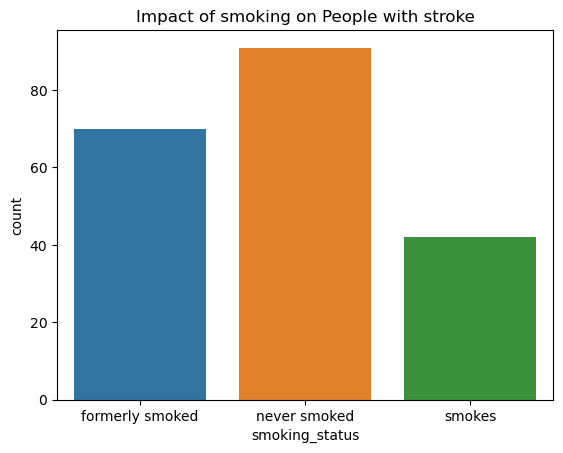

In [35]:
# Question_8: impact of smoking on People with stroke
#plt.figure(figsize=(10, 10))
sns.countplot(x=df_stroked['smoking_status'])
plt.title("Impact of smoking on People with stroke")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

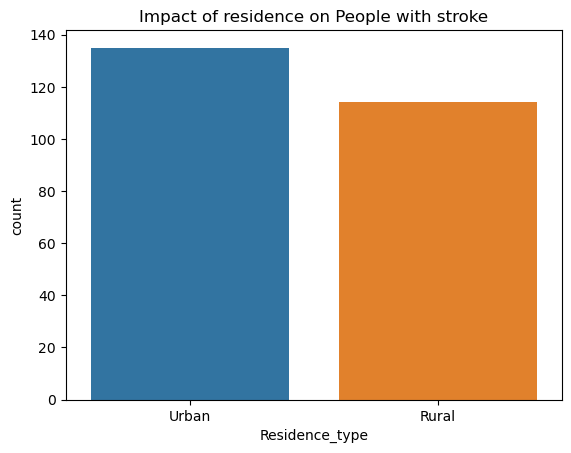

In [36]:
# Question_9: impact of residence type on People with stroke
#plt.figure(figsize=(10, 10))
sns.countplot(x=df_stroked['Residence_type'])
plt.title("Impact of residence on People with stroke")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

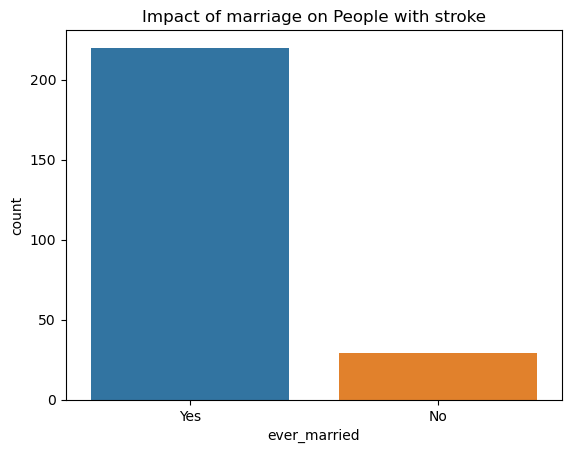

In [37]:
# Question_10: impact of marriage on People with stroke
#plt.figure(figsize=(10, 10))
sns.countplot(x=df_stroked['ever_married'])
plt.title("Impact of marriage on People with stroke")
plt.show

In [74]:
# Question_11: sort the factors (according to count numbers)which have impact on People with stroke

# details = df_stroked.apply(lambda x : True
#             if x['glucose_status'] == "Over glucose" else False, axis = 1) 
  
# # Count number of True in the series 
# num_rows = len(details[details == True].index) 
# num_rows
dict_factors = {}
factors={"heart_disease":1,"hypertension":1,"ever_married":"Yes","work_type":"Private","Residence_type":"Urban","smoking_status":"formerly smoked","body_mass_status":"Overweight","glucose_status":"Over glucose"}

for k,v in factors.items():
    #cou = int(df_stroked[df_stroked[k] == v][["age"]].count())
    details = df_stroked.apply(lambda x : True
            if x[k] == v else False, axis = 1) 
  
# Count number of True in the series 
    num_rows = len(details[details == True].index) 
    dict_factors[k,v]=num_rows
    
# Sort based on reverse of Values
val_based_rev = {k: v for k, v in sorted(dict_factors.items(), key=lambda item: item[1], reverse=True)}
val_based_rev




{('ever_married', 'Yes'): 220,
 ('work_type', 'Private'): 149,
 ('glucose_status', 'Over glucose'): 137,
 ('Residence_type', 'Urban'): 135,
 ('body_mass_status', 'Overweight'): 75,
 ('smoking_status', 'formerly smoked'): 70,
 ('hypertension', 1): 66,
 ('heart_disease', 1): 47}

c:\myanaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


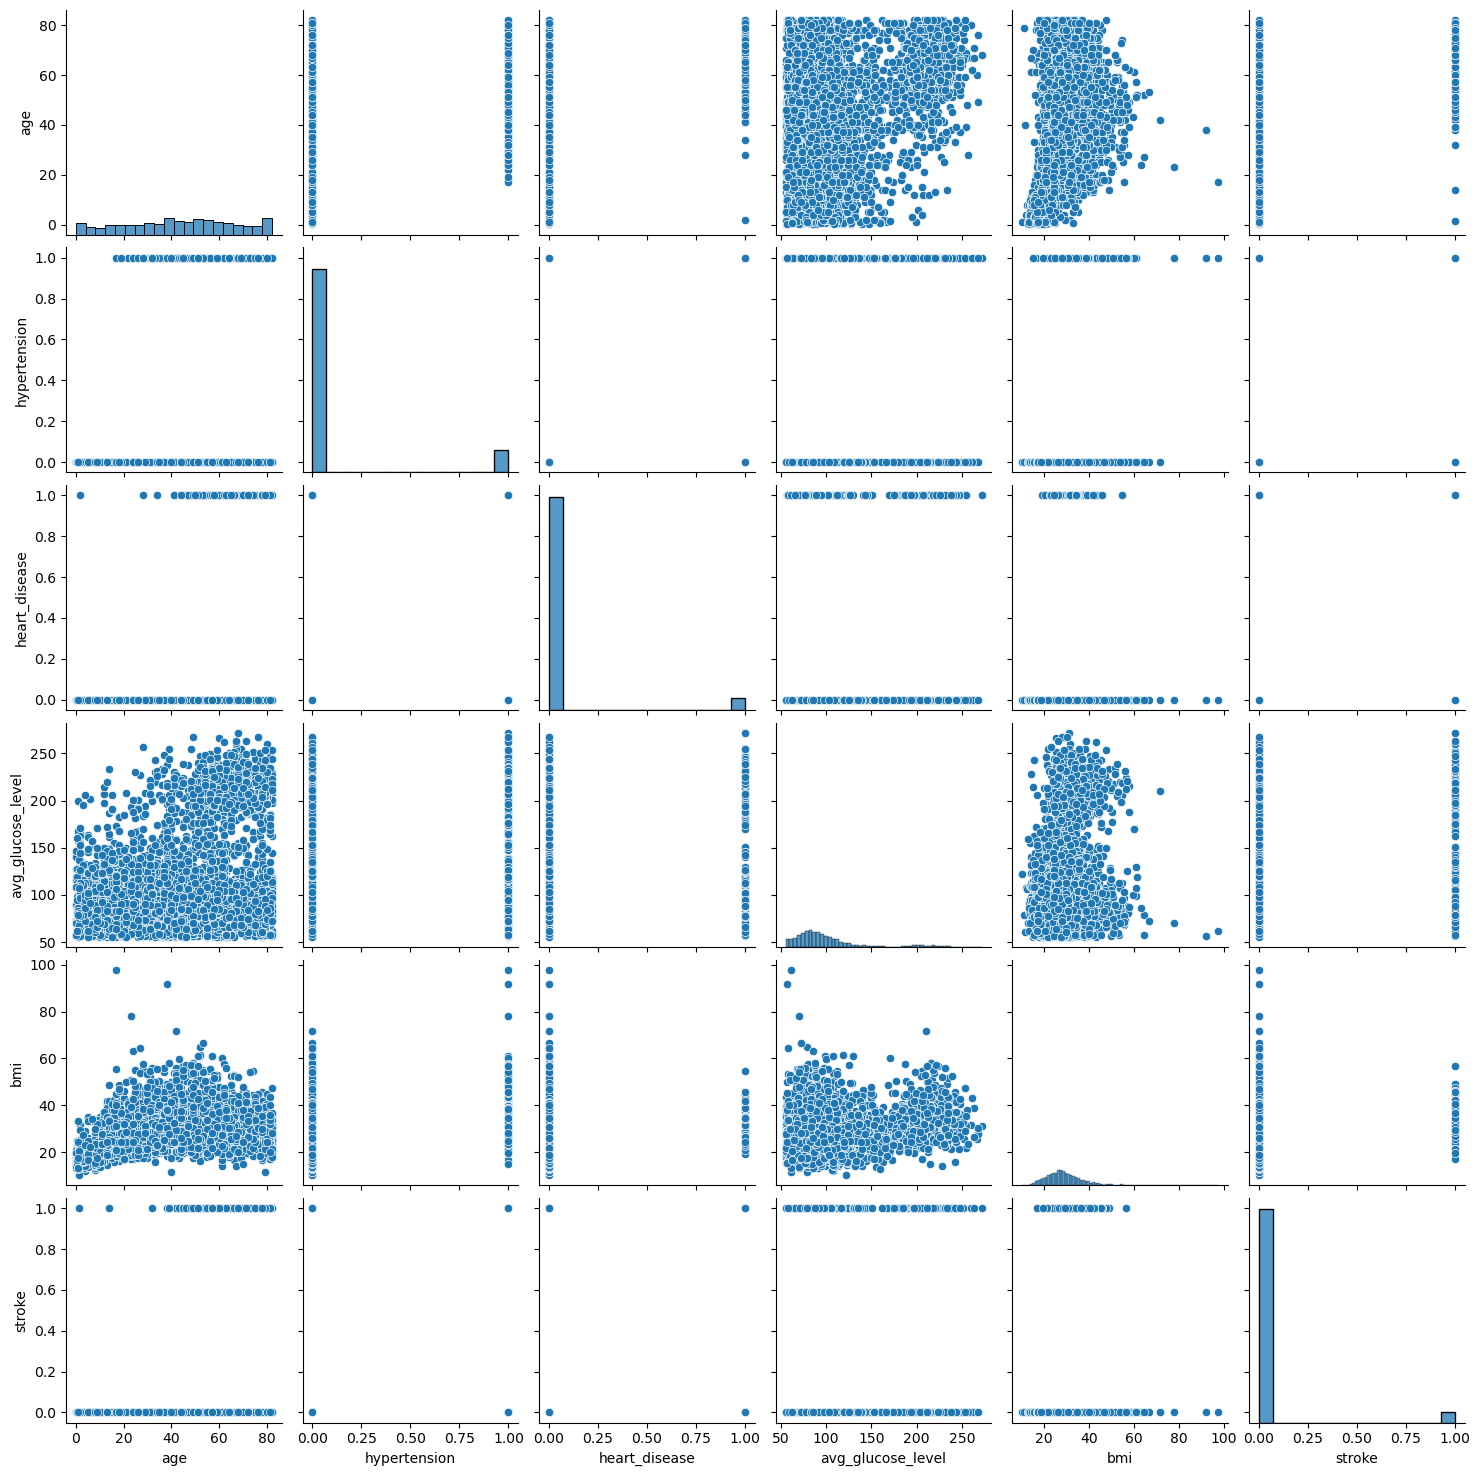

In [75]:
# multi-variate
sns.pairplot(df_stroke.select_dtypes(include='number'))

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [76]:
# a) Detect & Handle Duplicates
df_stroke.duplicated().sum()

0

In [77]:
#b) train_test_split
# classfication problem: our target  will be 'stroke' 


X = df_stroke.drop(['stroke'], axis=1)
y = df_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,body_mass_status,glucose_status
845,Female,48.0,0,0,Yes,Private,Urban,69.21,33.1,never smoked,Obese Class I,Under glucose
3745,Female,29.0,0,0,No,Private,Urban,84.19,21.2,never smoked,Normal,Normal glucose
4184,Female,35.0,0,0,Yes,Private,Rural,119.40,22.9,never smoked,Normal,Over glucose
3410,Male,38.0,0,0,Yes,Private,Rural,108.68,32.7,never smoked,Obese Class I,Over glucose
284,Male,14.0,0,0,No,Govt_job,Urban,82.34,31.6,NaN,Obese Class I,Normal glucose
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,Female,45.0,0,0,Yes,Private,Urban,92.86,35.1,formerly smoked,Obese Class II,Normal glucose
461,Female,16.0,0,0,No,children,Rural,113.47,19.5,NaN,Normal,Over glucose
1052,Female,61.0,0,0,Yes,Private,Rural,78.65,36.2,formerly smoked,Obese Class II,Normal glucose
1757,Male,31.0,0,0,Yes,Private,Urban,74.05,26.0,NaN,Overweight,Normal glucose


In [78]:
X_test.shape

(1022, 12)

In [79]:
y_train.value_counts(normalize=True) * 100

stroke
0    95.130903
1     4.869097
Name: proportion, dtype: float64

In [80]:
y_test.value_counts(normalize=True) * 100

stroke
0    95.107632
1     4.892368
Name: proportion, dtype: float64

In [81]:
# c) Detect & Handle NaNs
X_train.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  163
smoking_status       838
body_mass_status     163
glucose_status         0
dtype: int64

In [82]:
X_test.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                   38
smoking_status       209
body_mass_status      38
glucose_status         0
dtype: int64

In [83]:
# handeling nans in body_mass_status(fill None values with Nan )

X_train[['body_mass_status']] = X_train[['body_mass_status']].fillna(value=np.nan)
X_test[['body_mass_status']] = X_test[['body_mass_status']].fillna(value=np.nan)



In [84]:
X_test.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                   38
smoking_status       209
body_mass_status      38
glucose_status         0
dtype: int64

In [85]:
#  smoking_status, body_mass_status
## handle their NaNs from train and test with simpleimputer
simple_imputer = SimpleImputer(strategy='most_frequent')
X_train[['smoking_status', 'body_mass_status']] = simple_imputer.fit_transform(X_train[['smoking_status', 'body_mass_status']])
X_test[['smoking_status', 'body_mass_status']] = simple_imputer.transform(X_test[['smoking_status', 'body_mass_status']])
X_train.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  163
smoking_status         0
body_mass_status       0
glucose_status         0
dtype: int64

In [86]:
X_test.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  38
smoking_status        0
body_mass_status      0
glucose_status        0
dtype: int64

In [87]:
# handle 'bmi' with KNNImputer
knn_imputer = KNNImputer(n_neighbors = 2)
X_train[['bmi']] = knn_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = knn_imputer.transform(X_test[['bmi']])
X_train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
body_mass_status     0
glucose_status       0
dtype: int64

In [88]:
X_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
body_mass_status     0
glucose_status       0
dtype: int64

bmi


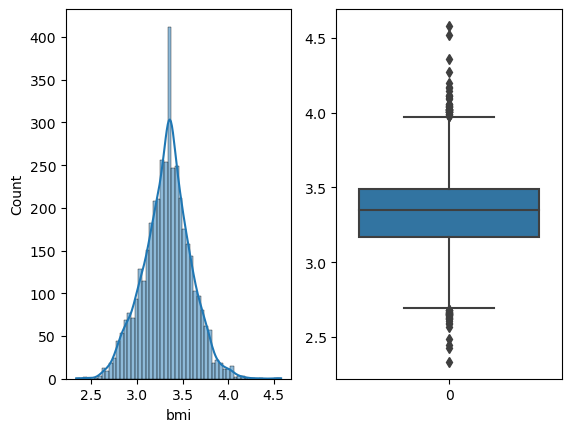

avg_glucose_level


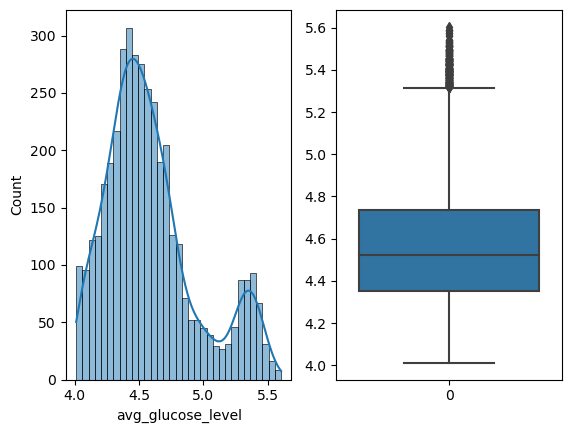

In [89]:
# d) Detect & Handle Outliers
# bmi , avg_glucose_level are right skewed
outlier_cols = ['bmi', 'avg_glucose_level']
for col in outlier_cols:
    print(col)
    X_train[col] = np.log(X_train[col])
    X_test[col] = np.log(X_test[col])
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(X_train[col], kde=True, ax=axes[0])
    sns.boxplot(X_train[col], ax=axes[1])
    plt.show()

In [90]:
# Encoding
#nomenal : gender		ever_married	work_type	Residence_type		smoking_status   body_mass_status	glucose_status
#ordinal : 	
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')
result_train = ohe_encoder.fit_transform(X_train[['gender', 'ever_married','work_type','Residence_type','smoking_status','glucose_status']])
result_test = ohe_encoder.transform(X_test[['gender', 'ever_married','work_type','Residence_type','smoking_status','glucose_status']])
ohe_train_df = pd.DataFrame(result_train, columns=ohe_encoder.get_feature_names_out(), index=X_train.index)
ohe_test_df = pd.DataFrame(result_test, columns=ohe_encoder.get_feature_names_out(), index=X_test.index)
ohe_train_df

,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,glucose_status_Over glucose,glucose_status_Under glucose
845,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3745,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4184,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3410,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
284,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1434,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1052,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [91]:
X_train['body_mass_status'].nunique()

8

In [92]:
# binary encoding for 'body_mass_status'
bin_encoder = BinaryEncoder()
bi_train_df = bin_encoder.fit_transform(X_train[['body_mass_status']])
bi_test_df = bin_encoder.transform(X_test[['body_mass_status']])
bi_train_df

,body_mass_status_0,body_mass_status_1,body_mass_status_2,body_mass_status_3
845,0,0,0,1
3745,0,0,1,0
4184,0,0,1,0
3410,0,0,0,1
284,0,0,0,1
...,...,...,...,...
1434,0,1,0,1
461,0,0,1,0
1052,0,1,0,1
1757,0,0,1,1


In [93]:
# concat
X_train = pd.concat([X_train, ohe_train_df, bi_train_df], axis=1).drop(['gender', 'ever_married','work_type','Residence_type','smoking_status','glucose_status','body_mass_status'], axis=1)
X_test = pd.concat([X_test, ohe_test_df, bi_test_df], axis=1).drop(['gender', 'ever_married','work_type','Residence_type','smoking_status','glucose_status','body_mass_status'], axis=1)
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,glucose_status_Over glucose,glucose_status_Under glucose,body_mass_status_0,body_mass_status_1,body_mass_status_2,body_mass_status_3
845,48.0,0,0,4.237145,3.499533,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,0,0,1
3745,29.0,0,0,4.433076,3.054001,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,1,0
4184,35.0,0,0,4.782479,3.131137,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0
3410,38.0,0,0,4.688408,3.487375,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1
284,14.0,0,0,4.410857,3.453157,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,45.0,0,0,4.531093,3.558201,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,1
461,16.0,0,0,4.731538,2.970414,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0
1052,61.0,0,0,4.365008,3.589059,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1757,31.0,0,0,4.304741,3.258097,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,1,1


In [94]:
# f) Handle Imbalanced Target
y_train.value_counts()

stroke
0    3888
1     199
Name: count, dtype: int64

In [2]:
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling



In [95]:
smote = SMOTE(k_neighbors=2, random_state=42)
smote

SMOTE(k_neighbors=2, random_state=42)

In [102]:
# apply smote oversampling on x_train , y_train
X_train_resampled_smote, y_train_resampled_smote =  smote.fit_resample(X_train, y_train)
X_train_resampled_smote

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,glucose_status_Over glucose,glucose_status_Under glucose,body_mass_status_0,body_mass_status_1,body_mass_status_2,body_mass_status_3
0,0.209397,0,0,-0.732784,0.474353,0.000000,1.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.000000,0.0,1.0,0,0,0,1
1,-0.629845,0,0,-0.226252,-0.905652,0.000000,0.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.000000,0.0,0.0,0,0,1,0
2,-0.364822,0,0,0.677046,-0.666729,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0,0,1,0
3,-0.232310,0,0,0.433847,0.436694,1.000000,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0,0,0,1
4,-1.292405,0,0,-0.283694,0.330706,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.000000,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,1.651926,0,0,2.143511,-0.512365,0.000000,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.000000,1.0,0.0,0,0,1,0
7772,0.701366,0,0,0.508309,0.368662,1.000000,1.0,0.0,1.0,0.0,0.0,0.965518,0.0,0.000000,1.0,0.0,0,0,0,1
7773,0.754452,0,0,0.498084,0.128984,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0,0,0,1
7774,0.988924,0,1,2.148355,0.033011,0.741773,1.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.000000,1.0,0.0,0,0,1,1


In [103]:
X_train_resampled_smote.duplicated().sum()

0

In [104]:
y_train_resampled_smote.value_counts()

stroke
0    3888
1    3888
Name: count, dtype: int64

In [105]:
# g) scaling
X_train_resampled_smote.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,glucose_status_Over glucose,glucose_status_Under glucose,body_mass_status_0,body_mass_status_1,body_mass_status_2,body_mass_status_3
count,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000
mean,0.516234,0.120113,0.075231,0.401325,0.040502,0.420291,0.778915,0.002058,0.583018,0.209190,0.072447,0.527005,0.616063,0.157451,0.461810,0.125430,0.009259,0.174640,0.600309,0.696116
std,0.956363,0.325115,0.263781,1.084760,0.688660,0.481677,0.405787,0.045317,0.483390,0.399993,0.258598,0.481853,0.474613,0.355094,0.497085,0.325971,0.095785,0.379683,0.489866,0.459963
min,-1.907260,0.000000,0.000000,-1.316588,-3.141555,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.011456,0.000000,0.000000,-0.424438,-0.309428,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.737338,0.000000,0.000000,0.087138,0.052123,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.768553,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.313663,0.000000,0.000000,1.209112,0.426126,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.711198,1.000000,1.000000,2.803077,3.823742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
# standered scaler for age
std_scaler = StandardScaler()
X_train_resampled_smote_scaled = X_train_resampled_smote.copy()
x_test_scaled = X_test.copy()
X_train_resampled_smote_scaled[['age']] = std_scaler.fit_transform(X_train_resampled_smote_scaled[['age']])
x_test_scaled[['age']] = std_scaler.transform(x_test_scaled[['age']])
# robust scaler for bmi and avg_glucose_level
rbst_scaler = RobustScaler()
X_train_resampled_smote_scaled[['bmi', 'avg_glucose_level']] = rbst_scaler.fit_transform(X_train_resampled_smote_scaled[['bmi', 'avg_glucose_level']])
x_test_scaled[['bmi', 'avg_glucose_level']] = rbst_scaler.transform(x_test_scaled[['bmi', 'avg_glucose_level']])
X_train_resampled_smote_scaled.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes,glucose_status_Over glucose,glucose_status_Under glucose,body_mass_status_0,body_mass_status_1,body_mass_status_2,body_mass_status_3
count,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000,7776.000000
mean,0.000000,0.120113,0.075231,0.192334,-0.015800,0.420291,0.778915,0.002058,0.583018,0.209190,0.072447,0.527005,0.616063,0.157451,0.461810,0.125430,0.009259,0.174640,0.600309,0.696116
std,1.000064,0.325115,0.263781,0.664051,0.936247,0.481677,0.405787,0.045317,0.483390,0.399993,0.258598,0.481853,0.474613,0.355094,0.497085,0.325971,0.095785,0.379683,0.489866,0.459963
min,-2.534236,0.000000,0.000000,-0.859310,-4.341868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.551804,0.000000,0.000000,-0.313168,-0.491536,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.231207,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.768553,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.833867,0.000000,0.000000,0.686832,0.508464,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.249568,1.000000,1.000000,1.662600,5.127590,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
X_train_resampled_smote_scaled.to_csv("X_train_scaled_resampled_scaled.csv")
x_test_scaled.to_csv("X_test_scaled.csv")
y_train_resampled_smote.to_csv("y_train_resampled.csv")
y_test.to_csv("y_test.csv")